# Import Library

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0,DenseNet121,MobileNetV2,EfficientNetV2S
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
SEED_VALUE = 1234
np.random.seed(SEED_VALUE)
import random
random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)
import os
import tensorflow as tf
from PIL import Image


# 2A. Data Exploratory

In [2]:
DATASET_PATH = "C:/UTS DL/Dataset2A-20240423T031221Z-001"
image_size = (224, 224)
batch_size = 4
SEED_VALUE = 42

full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "Dataset2A"),
    label_mode="categorical",
    seed=SEED_VALUE,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1600 files belonging to 4 classes.


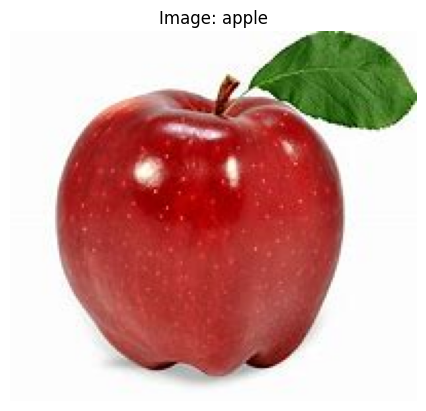

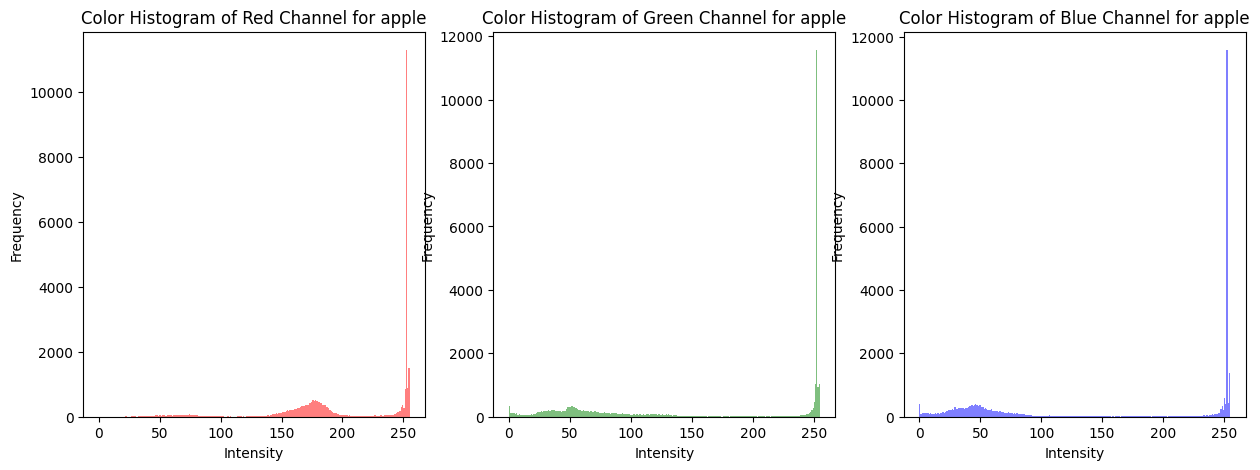

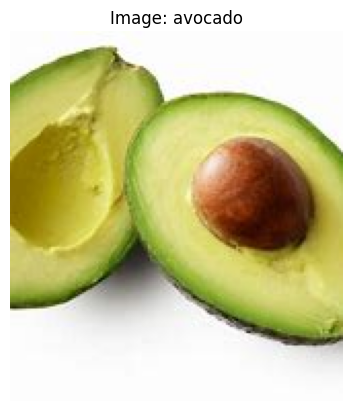

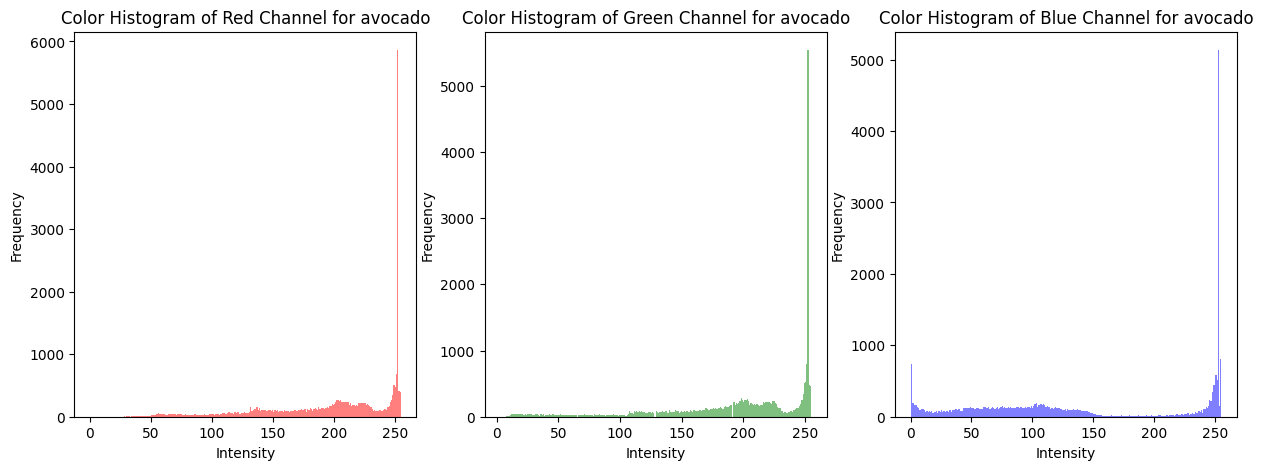

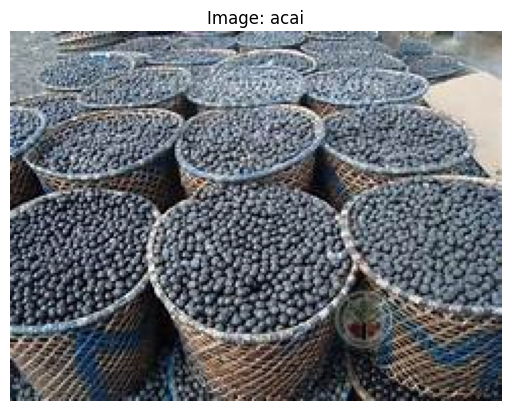

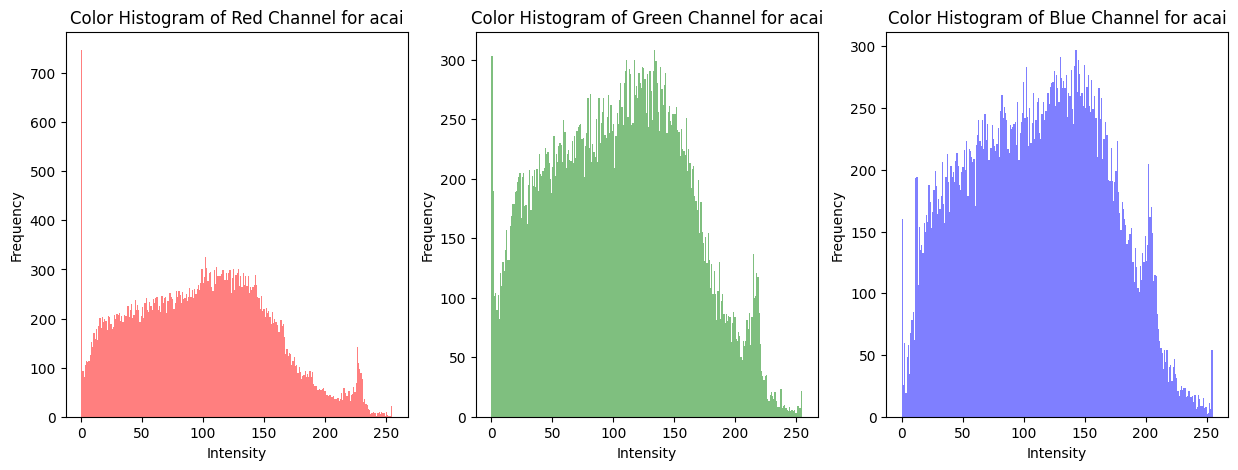

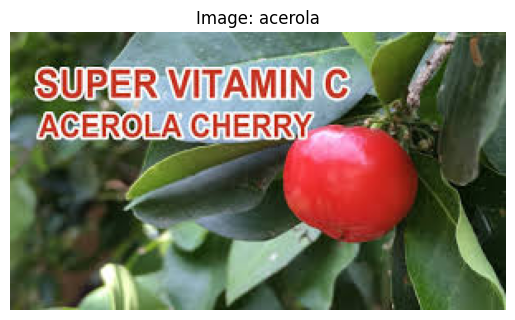

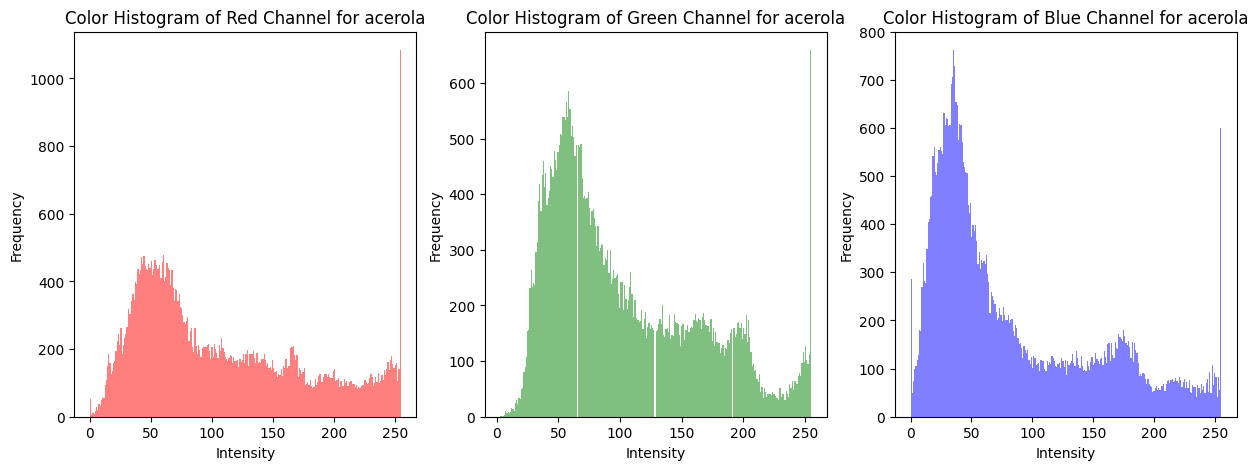

In [3]:
def plot_color_histogram_with_image(image_path, fruit_name):
    # Load and plot image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Image: {fruit_name}')
    plt.axis('off')
    plt.show()

    # Plot color histograms
    image_array = np.array(image)
    colors = ['red', 'green', 'blue']
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, color in enumerate(colors):
        axs[i].hist(image_array[:,:,i].flatten(), bins=256, color=color, alpha=0.5)
        axs[i].set_xlabel('Intensity')
        axs[i].set_ylabel('Frequency')
        axs[i].set_title(f'Color Histogram of {color.capitalize()} Channel for {fruit_name}')
    plt.show()

DATASET_PATH = "C:/UTS DL/Dataset2A-20240423T031221Z-001"
fruit_names = ['apple', 'avocado', 'acai', 'acerola']

for fruit_name in fruit_names:
    fruit_folder = os.path.join(DATASET_PATH, 'Dataset2A', fruit_name)
    image_files = os.listdir(fruit_folder)
    image_path = os.path.join(fruit_folder, image_files[0])  # Mengambil gambar pertama dari setiap folder
    plot_color_histogram_with_image(image_path, fruit_name)


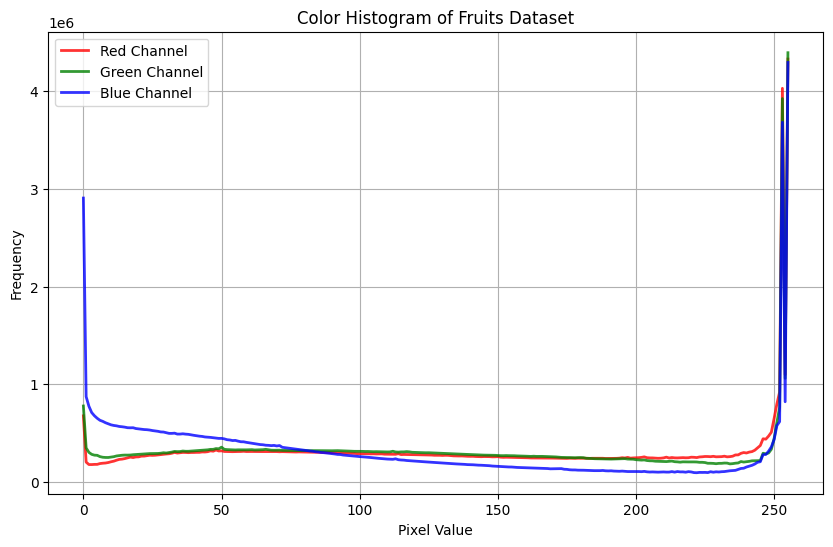

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def compute_color_histogram(image_batch):
    # Variabel untuk mengakumulasikan histogram warna
    red_histogram = np.zeros(256)
    green_histogram = np.zeros(256)
    blue_histogram = np.zeros(256)

    for image in image_batch:
        # Pisahkan gambar menjadi saluran warna (R, G, B)
        r_channel = np.ravel(image[:, :, 0].numpy())  # Konversi tensor menjadi array NumPy
        g_channel = np.ravel(image[:, :, 1].numpy())  # Konversi tensor menjadi array NumPy
        b_channel = np.ravel(image[:, :, 2].numpy())  # Konversi tensor menjadi array NumPy

        red_histogram += np.histogram(r_channel, bins=256, range=(0, 256))[0]
        green_histogram += np.histogram(g_channel, bins=256, range=(0, 256))[0]
        blue_histogram += np.histogram(b_channel, bins=256, range=(0, 256))[0]

    return red_histogram, green_histogram, blue_histogram

total_red_histogram = np.zeros(256)
total_green_histogram = np.zeros(256)
total_blue_histogram = np.zeros(256)

for images, _ in full_ds:
    red_hist, green_hist, blue_hist = compute_color_histogram(images)
    
    total_red_histogram += red_hist
    total_green_histogram += green_hist
    total_blue_histogram += blue_hist

red_colors = [(0, 'white'), (1, 'red')]
green_colors = [(0, 'white'), (1, 'green')]
blue_colors = [(0, 'white'), (1, 'blue')]
red_cmap = LinearSegmentedColormap.from_list('red_cmap', red_colors)
green_cmap = LinearSegmentedColormap.from_list('green_cmap', green_colors)
blue_cmap = LinearSegmentedColormap.from_list('blue_cmap', blue_colors)

plt.figure(figsize=(10, 6))

plt.plot(total_red_histogram, color='red', alpha=0.8, label='Red Channel', linewidth=2)
plt.plot(total_green_histogram, color='green', alpha=0.8, label='Green Channel', linewidth=2)
plt.plot(total_blue_histogram, color='blue', alpha=0.8, label='Blue Channel', linewidth=2)

plt.title('Color Histogram of Fruits Dataset')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


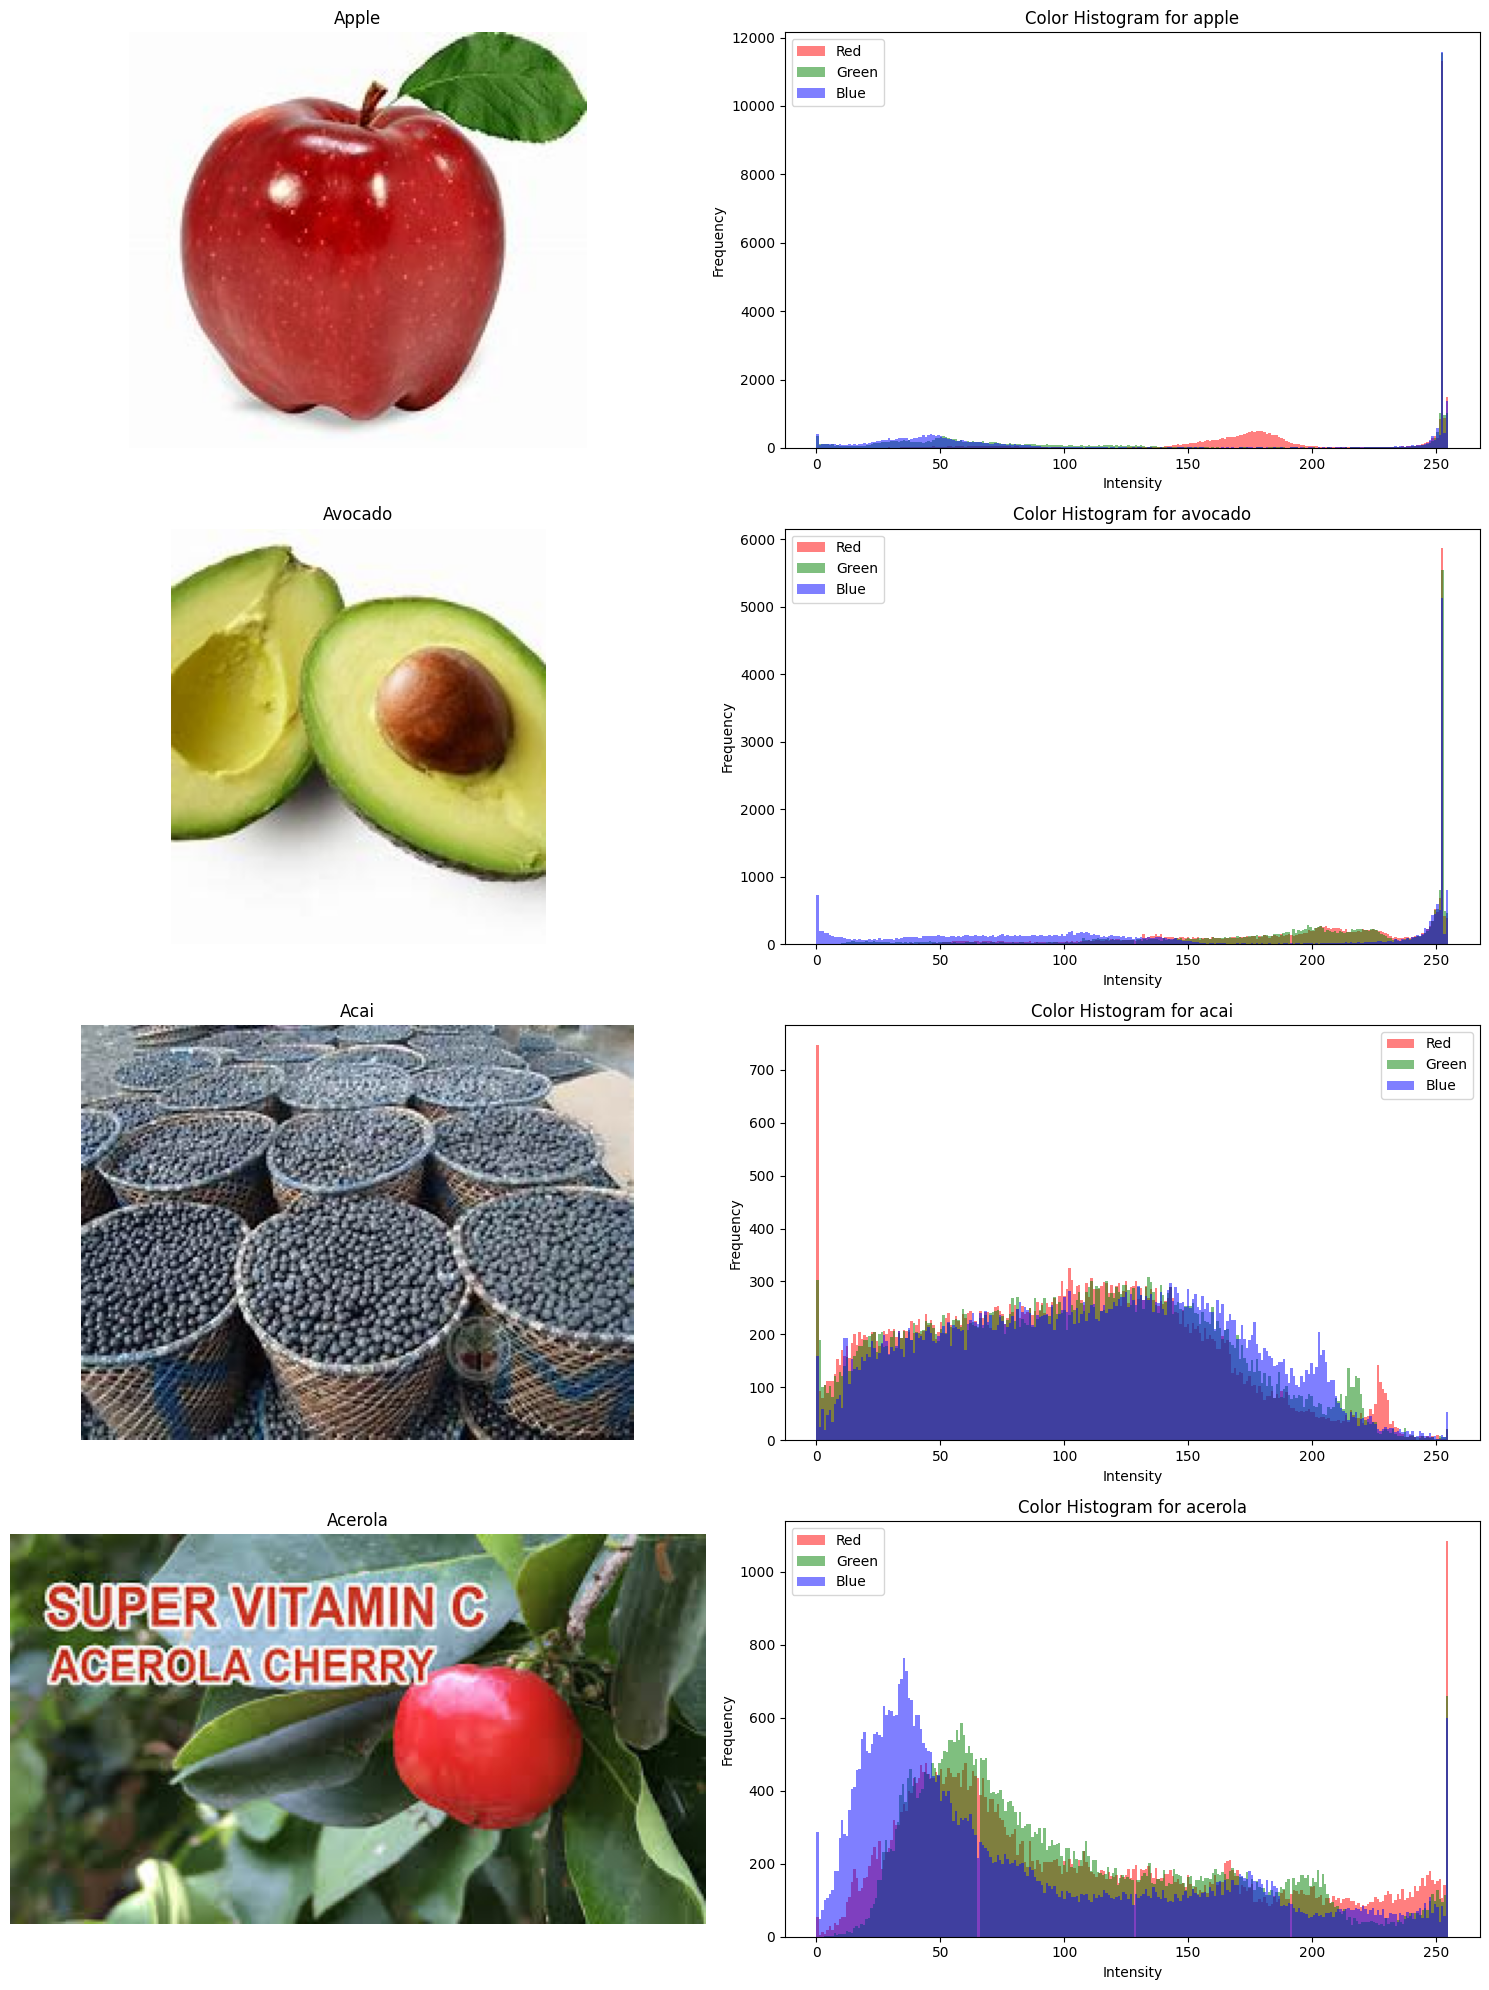

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def color_histogram(fruit_names, dataset_path):
    fig, axs = plt.subplots(len(fruit_names), 2, figsize=(15, 5 * len(fruit_names)))
    
    for i, fruit_name in enumerate(fruit_names):
        fruit_folder = os.path.join(dataset_path, 'Dataset2A', fruit_name)
        image_files = os.listdir(fruit_folder)
        image_path = os.path.join(fruit_folder, image_files[0])
        image = Image.open(image_path)
        image_array = np.array(image)
        
        axs[i, 0].imshow(image)
        axs[i, 0].set_title(f'{fruit_name.capitalize()}')
        axs[i, 0].axis('off')
        
        color_labels = ['Red', 'Green', 'Blue']
        colors = ['r', 'g', 'b']
        for j, (color, label) in enumerate(zip(colors, color_labels)):
            color_values = image_array[:,:,j].flatten()
            axs[i, 1].hist(color_values, bins=256, color=color, alpha=0.5, label=label)
        
        axs[i, 1].set_xlabel('Intensity')
        axs[i, 1].set_ylabel('Frequency')
        axs[i, 1].set_title(f'Color Histogram for {fruit_name}')
        axs[i, 1].legend()

    plt.tight_layout()
    plt.show()

DATASET_PATH = "C:/UTS DL/Dataset2A-20240423T031221Z-001"
fruit_names = ['apple', 'avocado', 'acai', 'acerola']
color_histogram(fruit_names, DATASET_PATH)


Insights

1. Apel (Grafik 1): Apel cenderung memiliki intensitas warna merah yang lebih dominan dibandingkan warna lainnya, dengan puncak distribusi terletak pada kisaran nilai 0-50 pada saluran warna merah. Intensitas warna hijau pada apel terlihat cukup seragam, dengan puncak distribusi pada nilai sekitar 100 pada saluran warna hijau. Sementara itu, intensitas warna biru pada apel cenderung rendah, dengan sebagian besar nilai terkonsentrasi di bawah 50 pada saluran warna biru. Kesimpulan: Fitur warna merah dan hijau mungkin memiliki peran penting dalam mengenali gambar apel, sementara fitur warna biru mungkin kurang signifikan.

2. Alpukat (Grafik 2): Intensitas warna merah pada alpukat cenderung rendah, dengan puncak distribusi yang sempit pada nilai sekitar 30 pada saluran warna merah. Intensitas warna hijau dan biru pada alpukat terlihat lebih menyebar, dengan puncak distribusi pada nilai sekitar 100-150 pada kedua saluran warna tersebut. Kesimpulan: Fitur warna hijau dan biru mungkin memiliki peran yang lebih penting dalam mengidentifikasi gambar alpukat daripada fitur warna merah.

3. Acai (Grafik 3): Acai menampilkan pola distribusi intensitas warna yang serupa di semua saluran (merah, hijau, dan biru), dengan puncak distribusi yang jelas terletak pada nilai sekitar 100-150. Kesimpulan: Kombinasi fitur warna merah, hijau, dan biru mungkin sama-sama penting dalam mengidentifikasi gambar acai.

4. Acerola (Grafik 4): Acerola menunjukkan dua puncak distribusi pada intensitas warna merah, satu pada nilai sekitar 50 dan yang lain pada nilai sekitar 200 pada saluran warna merah. Intensitas warna hijau dan biru pada acerola juga memiliki puncak distribusi yang jelas pada nilai sekitar 100-150 dan 150-200 pada masing-masing saluran warna tersebut. Kesimpulan: Fitur warna merah, hijau, dan biru mungkin memiliki peran yang sama-sama penting dalam mengidentifikasi gambar acerola, dengan kemungkinan variasi dalam intensitas warna merah.

##### Splitting

Sesuai permintaan soal yang diberikan, saya telah menyesuaikan dataset dengan meresize semua data menjadi ukuran 224x224. Kemudian, saya membagi dataset menjadi tiga bagian, yaitu 80% untuk pelatihan (train), 10% untuk validasi (val), dan 10% untuk pengujian (test). Karena dataset hanya terdiri dari satu folder, saya memutuskan untuk membagi dataset menjadi 80% untuk pelatihan dan 20% untuk validasi. Selanjutnya, dataset validasi saya bagi menjadi dua bagian dengan rasio 50% untuk validasi dan 50% untuk pengujian. Saya tidak menggunakan augmentasi karena menurut saya tidak perlu, saya sudah cukup puas dengan hasil yang saya miliki dan dengan menggunakan augmentasi ada kemungkinan hasilnya jadi rusak.

In [7]:
import os
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "Dataset2A"),
    validation_split=0.2,
    label_mode="categorical",
    subset="training",
    seed=SEED_VALUE,
    image_size=image_size,
    batch_size=batch_size,
)

val_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_PATH, "Dataset2A"),
    validation_split=0.2, 
    label_mode="categorical",
    subset="validation",
    seed=SEED_VALUE,
    image_size=image_size,
    batch_size=batch_size,
)

# Split val_test_ds into validation and test sets
val_size = int(0.5 * len(val_test_ds))
test_size = int(0.5 * len(val_test_ds))
val_ds = val_test_ds.take(val_size)
test_ds = val_test_ds.skip(val_size)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.
Found 1600 files belonging to 4 classes.
Using 320 files for validation.


# 2B. Challenges & Difficulty

#### Image Quality, Resolution & Noise

In [8]:
datasets = {'train': train_ds, 'validation': val_ds, 'test': test_ds}
dataset_resolutions = {}

for dataset_name, dataset in datasets.items():
    resolutions = []
    total_images = 0
    
    for images, _ in dataset:
        total_images += len(images)
        for image in images:
            resolutions.append(image.shape[:2])
    
    unique_resolutions = set(resolutions)
    
    dataset_resolutions[dataset_name] = {
        'total_images': total_images,
        'unique_resolutions': unique_resolutions
    }

print("Jumlah gambar dalam setiap dataset:")
for dataset_name, info in dataset_resolutions.items():
    print(f"{dataset_name.capitalize()} dataset:", info['total_images'])

print("\nJumlah resolusi unik dalam setiap dataset:")
for dataset_name, info in dataset_resolutions.items():
    print(f"Unique resolutions in {dataset_name.capitalize()} dataset:", len(info['unique_resolutions']))

print("\nResolusi unik dalam setiap dataset:")
for dataset_name, info in dataset_resolutions.items():
    print(f"Unique resolutions in {dataset_name.capitalize()} dataset:", info['unique_resolutions'])

Jumlah gambar dalam setiap dataset:
Train dataset: 1280
Validation dataset: 160
Test dataset: 160

Jumlah resolusi unik dalam setiap dataset:
Unique resolutions in Train dataset: 1
Unique resolutions in Validation dataset: 1
Unique resolutions in Test dataset: 1

Resolusi unik dalam setiap dataset:
Unique resolutions in Train dataset: {TensorShape([224, 224])}
Unique resolutions in Validation dataset: {TensorShape([224, 224])}
Unique resolutions in Test dataset: {TensorShape([224, 224])}


In [10]:
import os
import cv2

def is_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return False
    return image.shape[2] == 1  # Jika jumlah channel adalah 1, itu adalah gambar grayscale

grayscale_images = []
for root, dirs, files in os.walk(DATASET_PATH):
    for file in files:
        if file.endswith((".jpg", ".png")):
            image_path = os.path.join(root, file)
            if is_grayscale(image_path):
                grayscale_images.append(image_path)

print("Grayscale images detected:")
for img_path in grayscale_images:
    print(img_path)

Grayscale images detected:


In [9]:
import numpy as np

datasets = {'train': train_ds, 'validation': val_ds, 'test': test_ds}
dataset_num_pixels = {}

for dataset_name, dataset in datasets.items():
    num_pixels_list = []
    
    # Iterate over images in the dataset
    for images, _ in dataset:
        for img in images:
            num_pixels = img.shape[0] * img.shape[1] * img.shape[2]
            num_pixels_list.append(num_pixels)
    
    # Store dataset information
    dataset_num_pixels[dataset_name] = num_pixels_list

mean_num_pixels = {dataset_name: np.mean(num_pixels_list) for dataset_name, num_pixels_list in dataset_num_pixels.items()}
std_dev_num_pixels = {dataset_name: np.std(num_pixels_list) for dataset_name, num_pixels_list in dataset_num_pixels.items()}

outlier_thresholds = {dataset_name: mean + 3 * std_dev for dataset_name, mean, std_dev in zip(mean_num_pixels.keys(), mean_num_pixels.values(), std_dev_num_pixels.values())}

outliers = {}
for dataset_name, num_pixels_list in dataset_num_pixels.items():
    outliers[dataset_name] = [num_pixels for num_pixels in num_pixels_list if num_pixels > outlier_thresholds[dataset_name]]

print("Detected outliers:")
for dataset_name, outlier_list in outliers.items():
    print(f"{dataset_name.capitalize()} dataset:")
    for idx, outlier in enumerate(outlier_list):
        print(f"Outlier {idx + 1}: Number of Pixels = {outlier}")

Detected outliers:
Train dataset:
Validation dataset:
Test dataset:


Tidak terdapat noise outlier dalam jumlah piksel, dan seluruh gambar memiliki resolusi yang sama, yaitu 224x224 pixel. Selain itu, semua gambar berwarna 3 layer (Red, Green, Blue); tidak ada gambar yang dalam format grayscale atau hitam-putih. Gangguan atau noise pada gambar dapat berasal dari berbagai sumber seperti sensor kamera, kondisi lingkungan saat pengambilan gambar, atau bahkan dalam proses penyimpanan gambar. Ketika tingkat noise tinggi, model akan kesulitan dalam mengenali pola atau fitur yang relevan.

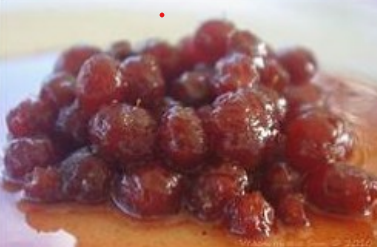

Resolution Example

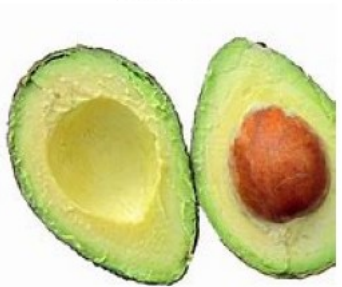

Noise Example

#### Image Variability

Lighting Conditions:

Gambar buah-buahan mungkin diambil dalam kondisi pencahayaan yang berbeda-beda, seperti cahaya alami dari matahari atau cahaya buatan dari lampu studio.
Perbedaan intensitas cahaya dan arah sumber cahaya dapat memengaruhi warna dan bayangan pada gambar, sehingga menambah variabilitas dalam mempresentasikan buah yang sati ukuran atau bentuk.





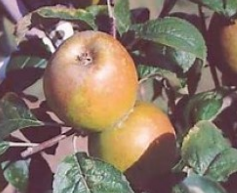

Perspective and Angle:

Gambar buah-buahan mungkin diambil dari sudut pandang yang berbeda, seperti tampak atas, samping, atau sudut miring. Perbedaan sudut pandang dapat menyebabkan variasi bentuk, ukuran, dan orientasi buah dalam gambar, sehingga menambah kompleksitas dalam proses identifikasi.

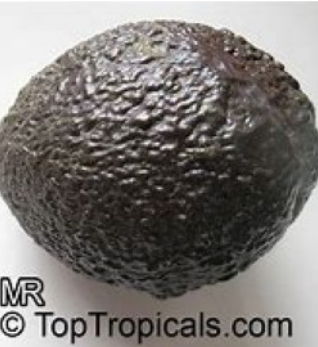

Occlusions:

Dalam beberapa gambar, buah-buahan mungkin terhalangi sebagian oleh objek lain atau bahkan saling menutupi satu sama lain. Oklusi dapat menyembunyikan fitur-fitur penting pada buah dan membuat proses identifikasi menjadi lebih sulit.


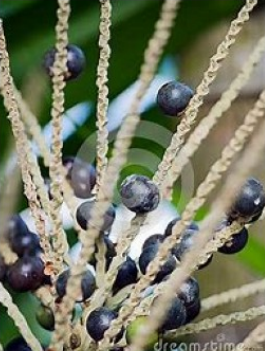


Background Variability:

Gambar buah-buahan mungkin memiliki latar belakang yang berbeda-beda, seperti permukaan kayu, kain, atau latar belakang yang kompleks.
Variabilitas latar belakang dapat menambah noise dan mengganggu proses identifikasi buah.


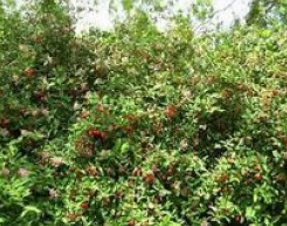

Scale Variations:

Gambar buah-buahan mungkin diambil dengan ukuran atau skala yang berbeda-beda, tergantung pada jarak pengambilan gambar.
Variasi skala dapat memengaruhi ukuran tampilan buah dalam gambar dan menyulitkan proses identifikasi berdasarkan fitur-fitur seperti ukuran atau bentuk.

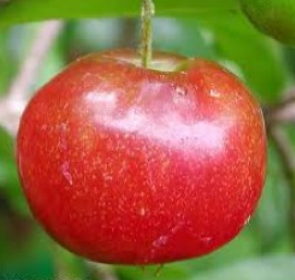

# 2C. Baseline Model

Arsitektur VGG-16 terdiri dari beberapa lapisan konvolusi dan lapisan fully connected. Lapisan konvolusi dibagi menjadi beberapa blok, di mana setiap blok terdiri dari beberapa lapisan konvolusi berturut-turut dengan kernel 3x3 dan fungsi aktivasi ReLU. Jumlah filter pada lapisan konvolusi meningkat seiring dengan kedalaman model, mulai dari 64 filter pada lapisan pertama hingga 512 filter pada lapisan keempat. Hal ini memungkinkan model untuk mengekstraksi fitur-fitur yang semakin kompleks dan abstrak dari gambar input. Setelah setiap blok konvolusi, terdapat lapisan max pooling dengan ukuran pool 2x2 dan strides 2x2. Lapisan max pooling bertujuan untuk mengurangi dimensi spasial dari fitur-fitur yang telah dipelajari dan membantu mengurangi overfitting. Setelah beberapa blok konvolusi, terdapat lapisan-lapisan fully connected (dense layers) yang bertugas untuk melakukan klasifikasi berdasarkan fitur-fitur yang telah dipelajari sebelumnya. Jumlah neuron pada lapisan-lapisan fully connected ditentukan oleh parameter yang diberikan. Lapisan output memiliki jumlah neuron yang sama dengan jumlah kelas yang ingin diprediksi dan menggunakan fungsi aktivasi softmax untuk menghasilkan probabilitas output untuk setiap kelas. Dalam base model ini, saya akan menerapkan konsep fine-tuning meskipun tidak memiliki akses ke bobot yang telah dilatih sebelumnya pada dataset besar seperti ImageNet. Teknik fine-tuning dalam transfer learning memungkinkan saya untuk memanfaatkan pengetahuan yang telah dipelajari oleh arsitektur seperti VGG-16 dari dataset besar, dan menyesuaikannya untuk dataset target yang lebih kecil yang saya miliki. Meskipun tidak memiliki bobot yang telah dilatih sebelumnya, saya dapat menggunakan arsitektur VGG-16 yang telah terbukti efektif sebagai titik awal pelatihan model saya. Dengan menggunakan arsitektur VGG-16, saya dapat memulai proses pelatihan dengan bobot awal yang sudah diinisialisasi dengan baik berdasarkan desain arsitektur yang telah dioptimalkan untuk tugas-tugas seperti klasifikasi gambar.

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Inisialisasi model sequential
vgg16_model = Sequential()

# Convolutional blocks
vgg16_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
vgg16_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16_model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten the output of the convolutional layers
vgg16_model.add(Flatten())

# Fully connected layers
vgg16_model.add(Dense(4096, activation='relu'))
vgg16_model.add(Dense(4096, activation='relu'))
vgg16_model.add(Dense(4, activation='softmax'))

# Print model summary
vgg16_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [12]:
vgg16_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = vgg16_model.fit(train_ds,
                          epochs=50,
                          validation_data=val_ds)

Epoch 1/50


C:\Users\helio\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


320/320 [==============================] - 76s 108ms/step - loss: 268.1554 - accuracy: 0.2586 - val_loss: 1.3970 - val_accuracy: 0.2125
Epoch 2/50
320/320 [==============================] - 36s 112ms/step - loss: 1.3879 - accuracy: 0.2484 - val_loss: 1.3922 - val_accuracy: 0.2188
Epoch 3/50
320/320 [==============================] - 34s 106ms/step - loss: 1.3869 - accuracy: 0.2430 - val_loss: 1.3920 - val_accuracy: 0.2125
Epoch 4/50
320/320 [==============================] - 34s 107ms/step - loss: 1.3867 - accuracy: 0.2422 - val_loss: 1.3926 - val_accuracy: 0.1937
Epoch 5/50
320/320 [==============================] - 34s 107ms/step - loss: 1.3867 - accuracy: 0.2492 - val_loss: 1.3915 - val_accuracy: 0.2000
Epoch 6/50
320/320 [==============================] - 35s 109ms/step - loss: 1.3866 - accuracy: 0.2469 - val_loss: 1.3918 - val_accuracy: 0.2125
Epoch 7/50
320/320 [==============================] - 36s 111ms/step - loss: 1.3865 - accuracy: 0.2492 - val_loss: 1.3925 - val_accuracy: 0

In [13]:
vgg16_model.evaluate(test_ds)

40/40 [==============================] - 2s 53ms/step - loss: 1.3852 - accuracy: 0.2562


[1.3851912021636963, 0.2562499940395355]

# 2D. Modified Architecture

Dalam modifikasi pertama menggunakan transfer learning, saya memanfaatkan arsitektur EfficientNetB0 yang telah dilatih sebelumnya dengan dataset ImageNet. Saya mengambil model dasar EfficientNetB0 tanpa lapisan teratas (top layer) dan menggantinya dengan lapisan global average pooling, diikuti oleh beberapa lapisan Dense yang terhubung secara penuh. Lapisan Dense ini diatur untuk memproses fitur-fitur yang diekstraksi oleh EfficientNetB0. Alasan saya memilih untuk membekukan 100 lapisan pertama dari EfficientNetB0 adalah untuk menjaga agar bobot yang sudah dilatih tidak terlalu berubah secara drastis selama proses pelatihan model saya. Kemudian, saya menambahkan beberapa lapisan Dropout untuk mencegah overfitting, serta BatchNormalization untuk meningkatkan stabilitas dan kecepatan konvergensi. Model ini kemudian dikompilasi dengan optimizer Adam dan loss categorical crossentropy, dengan tujuan untuk mengoptimalkan akurasi klasifikasi pada dataset yang diberikan.
n.n.

Sementara itu, pada modifikasi kedua menggunakan pendekatan fungsional, saya membangun arsitektur dari awal. Saya mendefinisikan lapisan-lapisan konvolusi dengan penambahan BatchNormalization untuk menjaga stabilitas pembelajaran. Setelah setiap blok konvolusi, saya memasukkan lapisan MaxPooling2D untuk mengekstraksi fitur secara hierarkis. Setelah beberapa lapisan konvolusi, saya menyisipkan lapisan GlobalAveragePooling2D untuk mengurangi dimensi fitur dan menghasilkan vektor fitur yang padat. Kemudian, vektor fitur tersebut dikonsekuensi dengan lapisan-lapisan Dense yang berukuran lebih kecil, diikuti oleh lapisan-lapisan Dropout untuk mengurangi overfitting. Akhirnya, saya menggunakan lapisan Dense terakhir dengan fungsi aktivasi softmax untuk menghasilkan probabilitas kelas output. Model ini juga dikompilasi dengan optimizer Adam dan loss categorical crossentropy, dengan tujuan yang sama seperti pada model transfer learning, yaitu meningkatkan akurasi klasifikasi pada dataset yang diberikan.

#### Using Transfer Learning

In [14]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:100]:
    layer.trainable = False

best_model = Sequential()

best_model.add(base_model)

best_model.add(GlobalAveragePooling2D())
best_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
best_model.add(BatchNormalization())
best_model.add(Dropout(0.5))
best_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
best_model.add(BatchNormalization())
best_model.add(Dropout(0.4))
best_model.add(Dense(4, activation='softmax'))

best_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

best_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [15]:
hist_modif2 = best_model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping], verbose=1)

Epoch 1/50
320/320 [==============================] - 19s 40ms/step - loss: 2.5009 - accuracy: 0.5414 - val_loss: 1.7312 - val_accuracy: 0.8313
Epoch 2/50
320/320 [==============================] - 9s 27ms/step - loss: 2.3632 - accuracy: 0.5445 - val_loss: 1.7448 - val_accuracy: 0.7625
Epoch 3/50
320/320 [==============================] - 7s 22ms/step - loss: 2.1309 - accuracy: 0.6320 - val_loss: 1.9208 - val_accuracy: 0.6812
Epoch 4/50
320/320 [==============================] - 7s 23ms/step - loss: 2.0128 - accuracy: 0.6727 - val_loss: 1.5956 - val_accuracy: 0.8500
Epoch 5/50
320/320 [==============================] - 7s 22ms/step - loss: 1.8498 - accuracy: 0.7258 - val_loss: 1.3858 - val_accuracy: 0.8687
Epoch 6/50
320/320 [==============================] - 8s 26ms/step - loss: 1.7326 - accuracy: 0.7453 - val_loss: 1.2864 - val_accuracy: 0.9187
Epoch 7/50
320/320 [==============================] - 11s 35ms/step - loss: 1.6710 - accuracy: 0.7484 - val_loss: 1.3802 - val_accuracy: 0.81

In [16]:
best_model.evaluate(test_ds)

40/40 [==============================] - 1s 15ms/step - loss: 0.5378 - accuracy: 0.9688


[0.5378270149230957, 0.96875]

#### Using Manual Functional API

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

inputs = Input(shape=(224, 224, 3))

# Convolutional blocks
y = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
y = BatchNormalization()(y)
y = Conv2D(32, (3, 3), padding='same', activation='relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D((2, 2))(y)
y = Dropout(0.2)(y)

y = Conv2D(64, (3, 3), padding='same', activation='relu')(y)
y = BatchNormalization()(y)
y = Conv2D(64, (3, 3), padding='same', activation='relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D((2, 2))(y)
y = Dropout(0.3)(y)

y = Conv2D(128, (3, 3), padding='same', activation='relu')(y)
y = BatchNormalization()(y)
y = Conv2D(128, (3, 3), padding='same', activation='relu')(y)
y = BatchNormalization()(y)
y = MaxPooling2D((2, 2))(y)
y = Dropout(0.4)(y)

# Global Average Pooling and Fully Connected Layers
y = GlobalAveragePooling2D()(y)
y = Dense(512, activation='relu')(y)
y = BatchNormalization()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation='relu')(y)
y = BatchNormalization()(y)
y = Dropout(0.4)(y)
outputs = Dense(4, activation='softmax')(y)

funct_model = Model(inputs=inputs, outputs=outputs)

funct_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

funct_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_2 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_3 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 32)     0     

In [18]:
epochs = 50
early_stopping_patience = 5

early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_patience, restore_best_weights=True)

hist_funct = funct_model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping], verbose=1)

Epoch 1/50
320/320 [==============================] - 18s 48ms/step - loss: 1.6310 - accuracy: 0.4047 - val_loss: 1.6803 - val_accuracy: 0.4313
Epoch 2/50
320/320 [==============================] - 16s 48ms/step - loss: 1.4109 - accuracy: 0.4586 - val_loss: 1.1462 - val_accuracy: 0.5813
Epoch 3/50
320/320 [==============================] - 15s 48ms/step - loss: 1.2924 - accuracy: 0.4883 - val_loss: 1.1616 - val_accuracy: 0.6375
Epoch 4/50
320/320 [==============================] - 16s 48ms/step - loss: 1.2094 - accuracy: 0.5133 - val_loss: 1.1823 - val_accuracy: 0.5125
Epoch 5/50
320/320 [==============================] - 16s 48ms/step - loss: 1.1286 - accuracy: 0.5344 - val_loss: 0.9543 - val_accuracy: 0.5625
Epoch 6/50
320/320 [==============================] - 16s 49ms/step - loss: 1.1171 - accuracy: 0.5305 - val_loss: 1.0090 - val_accuracy: 0.6313
Epoch 7/50
320/320 [==============================] - 16s 48ms/step - loss: 1.0512 - accuracy: 0.5727 - val_loss: 0.8072 - val_accuracy:

In [19]:
funct_model.evaluate(test_ds)

40/40 [==============================] - 1s 12ms/step - loss: 0.7761 - accuracy: 0.7500


[0.7760772109031677, 0.75]

#### Tuning

Berikut ini saya mencoba function untuk hyperparameter tuning dimana saya berhentikan secara paksa di epoch ke 50 karena terlalu lama dan menurut saya model yang saya dapatkan di modifikasi sebelumnya sudah cukup bagus hasilnya jadi tidak perlu tuning.

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import keras_tuner as kt

class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        input_shape = (224, 224, 3)
        hp_units1 = hp.Choice('units1', values=[32, 64, 128, 256, 512, 1024, 2048, 4096])
        hp_units2 = hp.Choice('units2', values=[32, 64, 128, 256, 512, 1024, 2048, 4096])
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        hp_dropout_rate1 = hp.Float('dropout_rate1', min_value=0.0, max_value=0.5, step=0.1)
        hp_dropout_rate2 = hp.Float('dropout_rate2', min_value=0.0, max_value=0.5, step=0.1)

        inputs = tf.keras.layers.Input(shape=input_shape)
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

        # Freeze some layers of the base model
        for layer in base_model.layers[:100]:
            layer.trainable = False

        x = base_model(inputs)
        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dense(hp_units1, activation='relu', kernel_regularizer=l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(hp_dropout_rate1)(x)
        x = layers.Dense(hp_units2, activation='relu', kernel_regularizer=l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(hp_dropout_rate2)(x)
        outputs = layers.Dense(4, activation='softmax')(x)

        model = Model(inputs=inputs, outputs=outputs)

        model.compile(
            optimizer=Adam(learning_rate=hp_learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

tuner = kt.Hyperband(
    MyHyperModel(),
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='bukti',
    project_name='kt'
)

# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping])
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 50 Complete [00h 02m 27s]
val_loss: 0.5371578931808472

Best val_loss So Far: 0.24098427593708038
Total elapsed time: 00h 40m 04s

Search: Running Trial #51

Value             |Best Value So Far |Hyperparameter
32                |32                |units1
64                |64                |units2
0.0001            |0.0001            |learning_rate
0                 |0                 |dropout_rate1
0.1               |0.1               |dropout_rate2
50                |17                |tuner/epochs
17                |6                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
3                 |2                 |tuner/round
0046              |0034              |tuner/trial_id

Epoch 18/50


KeyboardInterrupt: 

In [33]:
tuner.results_summary()

Results summary
Results in bukti\kt
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0046 summary
Hyperparameters:
units1: 32
units2: 64
learning_rate: 0.0001
dropout_rate1: 0.0
dropout_rate2: 0.1
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0034
Score: 0.24098427593708038

Trial 0034 summary
Hyperparameters:
units1: 32
units2: 64
learning_rate: 0.0001
dropout_rate1: 0.0
dropout_rate2: 0.1
tuner/epochs: 6
tuner/initial_epoch: 2
tuner/bracket: 3
tuner/round: 1
tuner/trial_id: 0033
Score: 0.3717615008354187

Trial 0047 summary
Hyperparameters:
units1: 64
units2: 2048
learning_rate: 0.0001
dropout_rate1: 0.0
dropout_rate2: 0.4
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0035
Score: 0.41176924109458923

Trial 0049 summary
Hyperparameters:
units1: 2048
units2: 128
learning_rate: 0.001
dropout_rate1: 0.0
dropout_rate2: 0.0
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 3
tu

# 2E. Evaluation

In [38]:
def test_model(model, test_data):
    y_true = []
    y_pred = []
    class_names = None

    for images, labels in test_data:
        y_pred_batch = model.predict(images)
        y_true.extend(np.argmax(labels, axis=1))  # Collecting true labels
        y_pred.extend(np.argmax(y_pred_batch, axis=1))  # Collecting predicted labels

        if class_names is None:
            class_names = [label for label in labels]

    class_names = ['acai', 'acerola', 'apple', 'avocado'] 
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot()
    plt.show()

    return y_pred, y_true

1/1 [==============================] - 0s 15ms/step


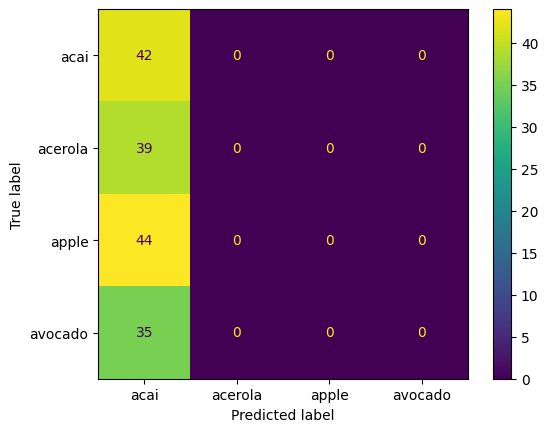

In [40]:
y_pred,y = test_model(vgg16_model,test_ds)

1/1 [==============================] - 0s 21ms/step


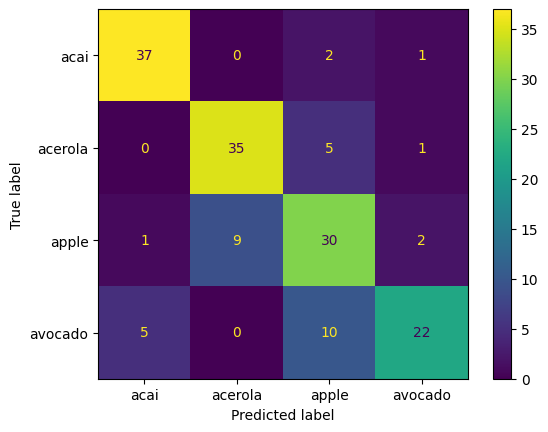

In [39]:
y_pred,y = test_model(funct_model,test_ds)

1/1 [==============================] - 0s 22ms/step


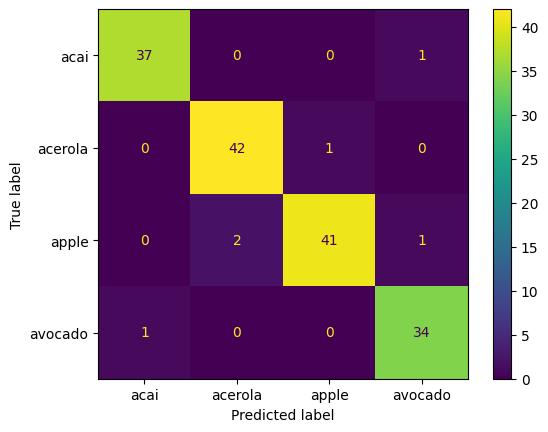

In [41]:
y_pred,y = test_model(best_model,test_ds)

Berdasarkan analisis dari gambar-gambar confusion matrix yang diberikan, dapat disimpulkan bahwa performa ketiga model dapat dibedakan dengan jelas. Pada Gambar 1, yang merupakan model dasar, terlihat bahwa model hanya dapat memprediksi dengan benar untuk kelas acai dan apple. Sementara itu, prediksi untuk kelas acerola dan avocado cenderung tidak akurat, menunjukkan performa yang buruk dalam mengklasifikasikan keempat jenis buah.

Pada Gambar 2, yang merupakan hasil dari modifikasi fungsional, terlihat adanya perbaikan dalam prediksi semua kelas dibandingkan dengan model dasar. Meskipun begitu, masih terdapat beberapa kesalahan prediksi, terutama dalam mengklasifikasikan acai dan acerola. Model ini menunjukkan peningkatan performa, namun masih belum optimal.

Sementara pada Gambar 3, yang merupakan hasil dari transfer learning, terlihat bahwa model ini memberikan hasil prediksi yang paling baik dibandingkan dengan dua model sebelumnya. Model dapat memprediksi dengan akurat untuk sebagian besar sampel dari keempat kelas, dengan sedikit kesalahan prediksi pada kelas apple dan avocado.

Kesalahan prediksi pada kelas avocado dimana dia bisa ada yang aslinya avocado tapi dideteksi sebagai acai/apple dikarenakan oleh warnanya yang hijau, ada beberapa apple yang hijau dan juga acai yang cederung gelap dapat berlaku juga sebaliknya baik acai/apple yang diprediksi sebagai avocado. Sedangkan untuk yang apple dan acerola mungkin ada kesalahan karena bentuknya yang lumayan mirip dan warnanya yang sama sama berwarna merah. 

Dari ketiga model tersebut, model transfer learning menonjol sebagai model terbaik berdasarkan confussion matrixnya. Hal ini disebabkan karena model ini dapat memanfaatkan pengetahuan yang telah dipelajari dari model pre-trained pada dataset besar (seperti ImageNet) dan menyesuaikannya dengan dataset target melalui proses fine-tuning. Dengan cara ini, model dapat menggunakan fitur-fitur umum yang telah dipelajari sebelumnya dan menyesuaikannya dengan karakteristik spesifik dari dataset buah-buahan. Selain itu, proses fine-tuning juga memungkinkan model untuk belajar fitur-fitur baru yang relevan dengan dataset target, sehingga meningkatkan performa klasifikasi secara signifikan.

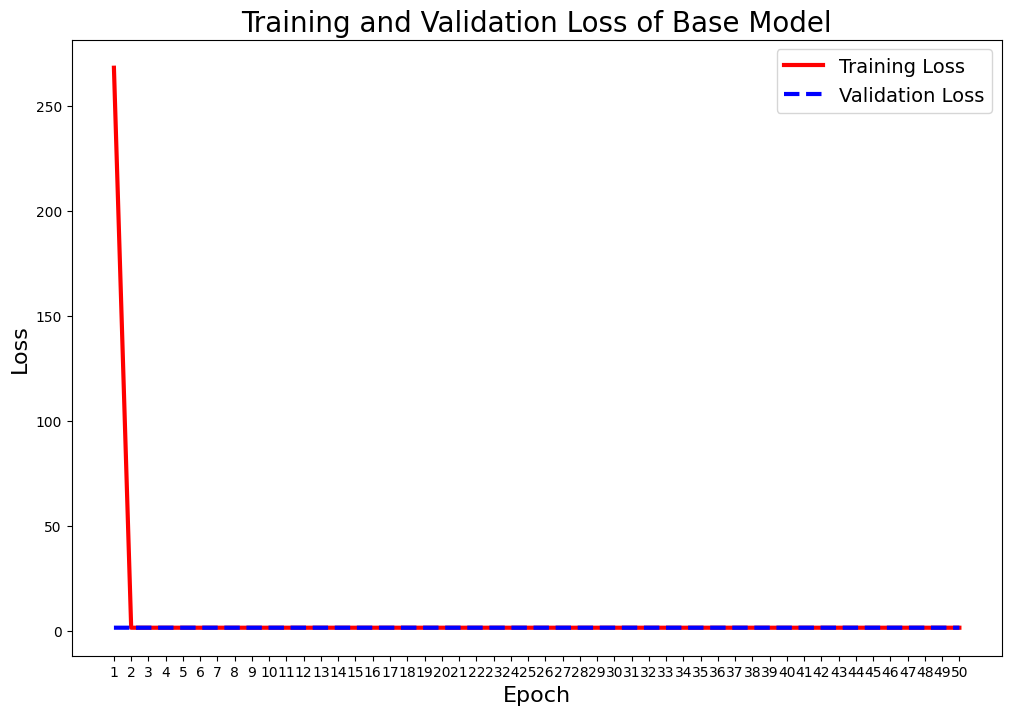

In [51]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(epochs, train_loss, 'r', linewidth=3, label='Training Loss')
ax.plot(epochs, val_loss, 'b--', linewidth=3, label='Validation Loss')

# Set the title and axis labels
ax.set_title('Training and Validation Loss of Base Model', fontsize=20)
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

# Set the x-axis tick labels
ax.set_xticks(epochs)

# Add a legend
ax.legend(fontsize=14)

# Show the plot
plt.show()

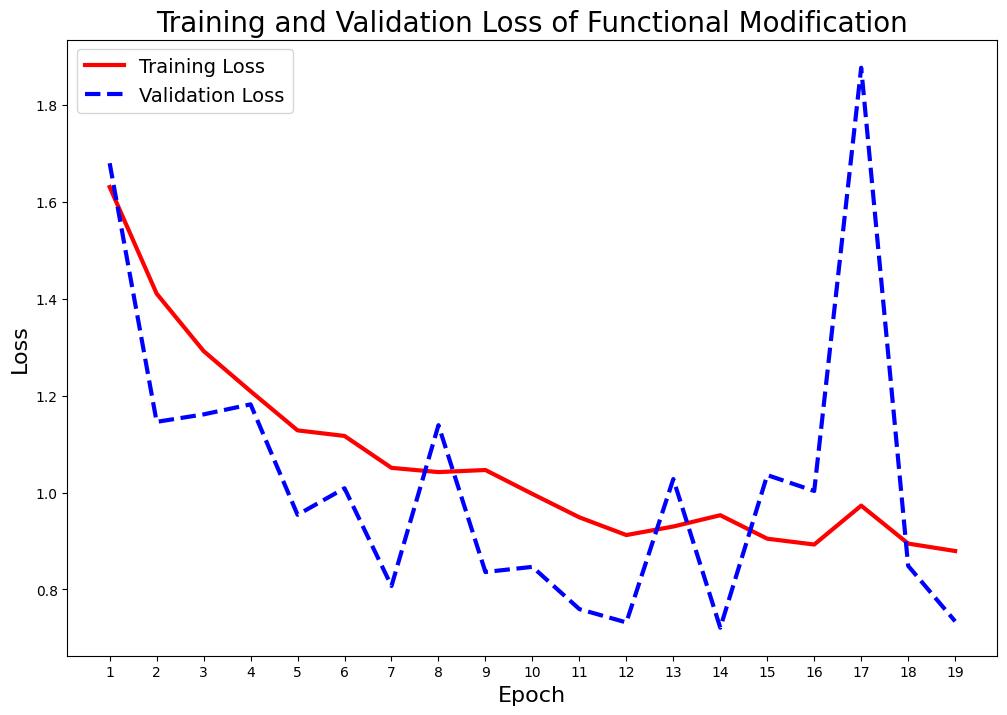

In [52]:
import matplotlib.pyplot as plt

train_loss = hist_funct.history['loss']
val_loss = hist_funct.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(epochs, train_loss, 'r', linewidth=3, label='Training Loss')
ax.plot(epochs, val_loss, 'b--', linewidth=3, label='Validation Loss')

# Set the title and axis labels
ax.set_title('Training and Validation Loss of Functional Modification', fontsize=20)
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

# Set the x-axis tick labels
ax.set_xticks(epochs)

# Add a legend
ax.legend(fontsize=14)

# Show the plot
plt.show()

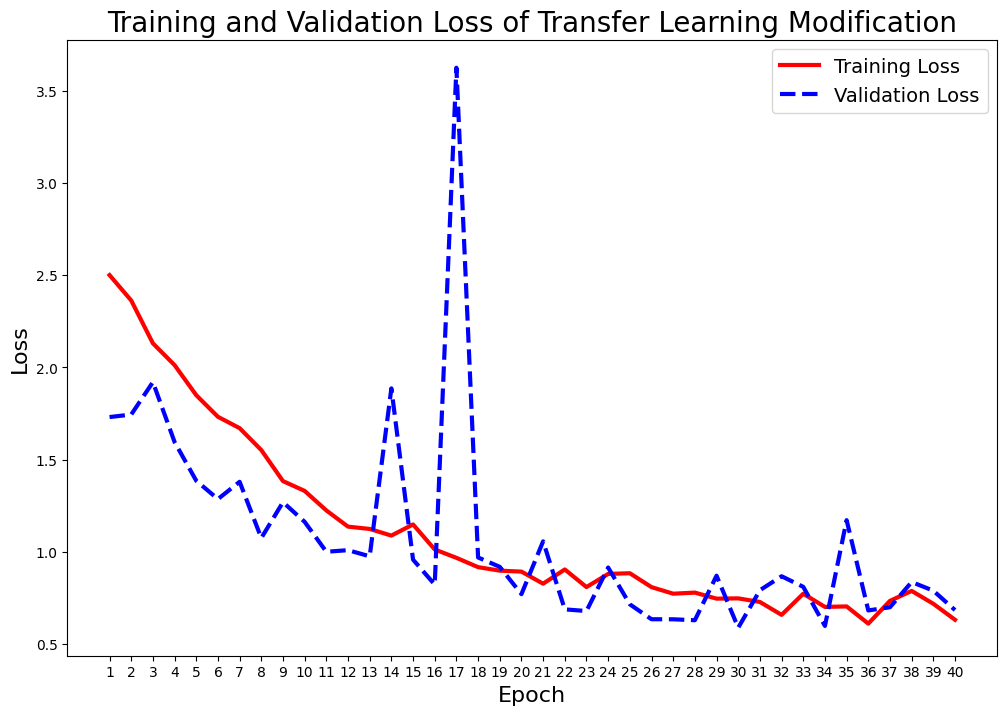

In [53]:
import matplotlib.pyplot as plt

train_loss = hist_modif2.history['loss']
val_loss = hist_modif2.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(epochs, train_loss, 'r', linewidth=3, label='Training Loss')
ax.plot(epochs, val_loss, 'b--', linewidth=3, label='Validation Loss')

# Set the title and axis labels
ax.set_title('Training and Validation Loss of Transfer Learning Modification', fontsize=20)
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

# Set the x-axis tick labels
ax.set_xticks(epochs)

# Add a legend
ax.legend(fontsize=14)

# Show the plot
plt.show()

Gambar 1 menunjukkan training loss dan validation loss untuk base model . Training loss awalnya sangat tinggi tetapi cepat turun mendekati nol, sedangkan validation loss tetap konsisten rendah sepanjang proses pelatihan. Hal ini menunjukkan bahwa base model terlalu overfitting terhadap data pelatihan, karena mampu mencapai training loss yang sangat rendah tetapi gagal untuk melakukan generalisasi dengan baik pada data validasi.

Gambar 2 menggambarkan training loss dan validation loss untuk modifikasi fungsional. Baik training loss maupun validation loss mulai relatif tinggi tetapi menurun secara stabil seiring berjalannya pelatihan. Validation loss menunjukkan lebih banyak fluktuasi dibandingkan training loss, namun secara umum keduanya mengikuti tren penurunan yang serupa. Perilaku ini diharapkan pada model yang diregularisasi dengan baik dan tidak mengalami overfitting atau underfitting.

Gambar 3 mengilustrasikan training loss dan validation loss untuk modifikasi transfer learning. Awalnya, kedua loss cukup tinggi, namun training loss menurun dengan cepat, sementara validation loss tetap tinggi. Namun, setelah melewati titik tertentu, validation loss juga mulai menurun, meskipun dengan fluktuasi yang lebih besar dibandingkan training loss. Pola ini menunjukkan bahwa model transfer learning awalnya mengalami overfitting tetapi akhirnya mampu melakukan generalisasi yang lebih baik pada data validasi.

Secara ringkas, base model tampak mengalami overfitting yang parah, sedangkan modifikasi fungsional dan modifikasi transfer learning menunjukkan perilaku yang lebih diinginkan, dengan modifikasi fungsional memiliki kinerja yang lebih konsisten di antara training dan validasi. Modifikasi transfer learning awalnya overfitting tetapi akhirnya konvergen ke validation loss yang masuk akal, menunjukkan kemampuannya untuk memanfaatkan pengetahuan sebelumnya sekaligus beradaptasi dengan tugas baru.